Shape of the dataset: (2059418, 77)


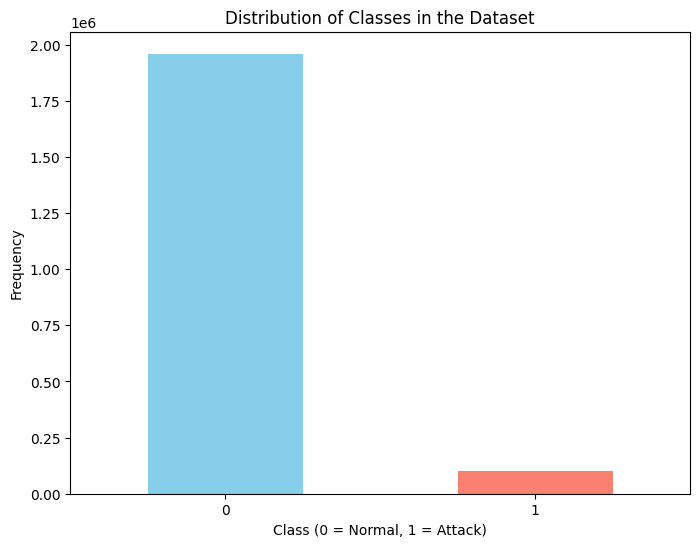

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)

# Display the shape of the dataset
print("Shape of the dataset:", data.shape)

# Plot the distribution of the target variable (Label)
plt.figure(figsize=(8, 6))
data['Label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Classes in the Dataset")
plt.xlabel("Class (0 = Normal, 1 = Attack)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Load the full dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)

# Remove 'srcip', 'dstip', and 'attack_cat' columns
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Sample a subset of the data for grid search to reduce memory usage
sample_data = data.sample(n=200000, random_state=42)  # Sample 200,000 rows
X_sample = sample_data.drop('Label', axis=1)
y_sample = sample_data['Label']

# Define the RandomForest model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Max depth of each tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required at a leaf node
    'class_weight': ['balanced', 'balanced_subsample']  # Handle class imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Fit the grid search to the sampled training data
grid_search.fit(X_sample, y_sample)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score from Grid Search:", best_score)

# Train the model with the best parameters on the full dataset
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X, y)  # Train on the full data with the best parameters

# Split full dataset into training and validation for final evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate the model on the validation set
val_preds = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds, average='weighted')
val_precision = precision_score(y_val, val_preds, average='weighted')
val_recall = recall_score(y_val, val_preds, average='weighted')

# Print validation results
print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("\nClassification Report (Validation Set):\n", classification_report(y_val, val_preds))


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\ishan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score from Grid Search: 0.9929442368379744
Validation Accuracy: 1.0
Validation F1 Score: 1.0
Validation Precision: 1.0
Validation Recall: 1.0

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    587936
           1       1.00      1.00      1.00     29890

    accuracy                           1.00    617826
   macro avg       1.00      1.00      1.00    617826
weighted avg       1.00      1.00      1.00    617826



In [146]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Load the full dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)

# Remove 'srcip', 'dstip', and 'attack_cat' columns
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Display the shape of the dataset before training
print("Shape of the dataset:", data.shape)

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest model with best parameters from Grid Search
model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Start the timer for training time
start_training_time = time.time()

# Train the model
model.fit(X_train, y_train)

# End the timer for training time
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Calculate training accuracy
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Start the timer for testing time
start_testing_time = time.time()

# Predict on the validation set
val_preds = model.predict(X_val)

# End the timer for testing time
end_testing_time = time.time()
testing_time = end_testing_time - start_testing_time

# Calculate validation accuracy and other metrics
val_accuracy = accuracy_score(y_val, val_preds)
val_f1 = f1_score(y_val, val_preds, average='weighted')
val_precision = precision_score(y_val, val_preds, average='weighted')
val_recall = recall_score(y_val, val_preds, average='weighted')

# Output results
print(f"Training Time (seconds): {training_time}")
print(f"Testing Time (seconds): {testing_time}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation F1 Score: {val_f1}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")

# Classification Report for additional insights
print("\nClassification Report (Validation Set):\n", classification_report(y_val, val_preds))

# Check for overfitting
if train_accuracy - val_accuracy > 0.1:
    print("Warning: Potential overfitting detected. Consider tuning the model.")
else:
    print("No significant overfitting detected.")


Shape of the dataset: (2059418, 74)
Training Time (seconds): 706.9816617965698
Testing Time (seconds): 6.890068531036377
Training Accuracy: 0.9999993063224546
Validation Accuracy: 0.9947687536620343
Validation F1 Score: 0.9947349684194035
Validation Precision: 0.9947189795322431
Validation Recall: 0.9947687536620343

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    587936
           1       0.96      0.93      0.95     29890

    accuracy                           0.99    617826
   macro avg       0.98      0.97      0.97    617826
weighted avg       0.99      0.99      0.99    617826

No significant overfitting detected.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Load the full dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)

# Drop unnecessary columns
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Reduce the dataset size for faster execution and to prevent memory issues
data = data.sample(n=50000, random_state=42)  # Adjust sample size as needed

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model with tree_method set to 'hist' for CPU usage
model = XGBClassifier(use_label_encoder=False, tree_method='hist', random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV with error_score='raise' to identify failed fits
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    error_score='raise'  # Raises an error if a combination fails, for debugging
)

# Run Grid Search
print("Running Grid Search...")
grid_search.fit(X_train, y_train)

# Get the best parameters and F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print performance metrics
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Running Grid Search...
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best F1 Score from Grid Search: 0.992212310676783
Accuracy on Test Set: 0.9918666666666667

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14279
           1       0.91      0.92      0.92       721

    accuracy                           0.99     15000
   macro avg       0.95      0.96      0.96     15000
weighted avg       0.99      0.99      0.99     15000



In [3]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load the full dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)

# Drop unnecessary columns
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost with best parameters from Grid Search
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 1.0,
    'use_label_encoder': False,
    'tree_method': 'hist',  # Optimized for CPU training
    'random_state': 42
}

model = XGBClassifier(**best_params)

# Train the model
print("Training XGBoost model...")
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Training XGBoost model...
Accuracy on Test Set: 0.9934188590315073

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    587936
           1       0.93      0.93      0.93     29890

    accuracy                           0.99    617826
   macro avg       0.97      0.96      0.96    617826
weighted avg       0.99      0.99      0.99    617826



In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model for permutation importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate Permutation Importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_features = pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Select the top 6 features based on Permutation Importance
top_6_perm_features = perm_features.head(6).index.tolist()
print("Top 6 Permutation Importance Features:", top_6_perm_features)

# Save the reduced dataset using only the selected features
X_train_perm_selected = X_train[top_6_perm_features]
X_test_perm_selected = X_test[top_6_perm_features]


Top 6 Permutation Importance Features: ['ct_state_ttl', 'packet_count_change_rate', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'byte_count_change_rate']


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the top 6 permutation importance features
X = data[['ct_state_ttl', 'packet_count_change_rate', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'byte_count_change_rate']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest model with controlled parallelism
rf_model = RandomForestClassifier(
    n_estimators=300,       # Original parameter
    max_depth=None,         # Original parameter
    min_samples_split=2,    # Original parameter
    min_samples_leaf=1,     # Original parameter
    class_weight='balanced',
    n_jobs=4,               # Controlled parallelism to reduce resource strain
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Random Forest Results:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.990549119007617
F1 Score: 0.9905927083723889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    587936
           1       0.89      0.91      0.90     29890

    accuracy                           0.99    617826
   macro avg       0.95      0.95      0.95    617826
weighted avg       0.99      0.99      0.99    617826



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the top 6 permutation importance features
X = data[['ct_state_ttl', 'packet_count_change_rate', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'byte_count_change_rate']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model with the best parameters and controlled parallelism
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,  # Newer versions of XGBoost require this
    eval_metric='logloss',    # Specify an eval metric to suppress warnings
    n_jobs=4,                 # Controlled parallelism to prevent resource strain
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("XGBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


XGBoost Results:
Accuracy: 0.9890454594011906
F1 Score: 0.9891695622795099

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    587936
           1       0.87      0.91      0.89     29890

    accuracy                           0.99    617826
   macro avg       0.93      0.95      0.94    617826
weighted avg       0.99      0.99      0.99    617826



In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Separate features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate Mutual Information
mutual_info_values = mutual_info_classif(X_train, y_train, random_state=42)
mutual_info_features = pd.Series(mutual_info_values, index=X_train.columns).sort_values(ascending=False)

# Select the top 6 features based on Mutual Information
top_6_mutual_info_features = mutual_info_features.head(6).index.tolist()
print("Top 6 Mutual Information Features:", top_6_mutual_info_features)

# Save the reduced dataset using only the selected features
X_train_mutual_info_selected = X_train[top_6_mutual_info_features]
X_test_mutual_info_selected = X_test[top_6_mutual_info_features]


Top 6 Mutual Information Features: ['sttl', 'ttl_diff', 'dttl', 'proto_state_interaction', 'window_diff', 'sport_binned']


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the top 6 Mutual Information features
X = data[['sttl', 'ttl_diff', 'dttl', 'proto_state_interaction', 'window_diff', 'sport_binned']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with the best hyperparameters found previously
rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("Random Forest Results:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9859232211010868
F1 Score: 0.9867626860245129

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    587936
           1       0.77      1.00      0.87     29890

    accuracy                           0.99    617826
   macro avg       0.89      0.99      0.93    617826
weighted avg       0.99      0.99      0.99    617826



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the top 6 Mutual Information features
X = data[['sttl', 'ttl_diff', 'dttl', 'proto_state_interaction', 'window_diff', 'sport_binned']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model with the best hyperparameters found previously
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Output the results
print("XGBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


XGBoost Results:
Accuracy: 0.9858827566337448
F1 Score: 0.9867216944591903

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    587936
           1       0.77      1.00      0.87     29890

    accuracy                           0.99    617826
   macro avg       0.89      0.99      0.93    617826
weighted avg       0.99      0.99      0.99    617826



In [16]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
df = pd.read_csv(data_path)

# Define columns to ignore
columns_to_ignore = ['srcip', 'dstip', 'attack_cat']
df = df.drop(columns=columns_to_ignore)

# Separate features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Calculate Information Gain (IG) scores
ig_scores = mutual_info_classif(X, y)
ig_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain Score': ig_scores
}).sort_values(by='Information Gain Score', ascending=False)

# Display Information Gain scores
print("Information Gain (IG) Scores for Features:")
print(ig_scores_df)


Information Gain (IG) Scores for Features:
                    Feature  Information Gain Score
3                      sttl                0.396694
4                      dttl                0.379538
55                 ttl_diff                0.360198
40  proto_state_interaction                0.280599
57              window_diff                0.274566
..                      ...                     ...
32               ct_ftp_cmd                0.001346
31             is_ftp_login                0.001185
42          service_grouped                0.000263
41            proto_grouped                0.000222
28          is_sm_ips_ports                0.000122

[73 rows x 2 columns]


In [17]:
import pandas as pd

# Assuming df is loaded and preprocessed as in Part 1
# Calculate correlation matrix for the features
correlation_matrix = df.drop(columns=['Label']).corr()

# Optional: Set a correlation threshold for filtering
correlation_threshold = 0.05  # Adjust based on your needs
correlation_matrix = correlation_matrix.applymap(lambda x: x if abs(x) >= correlation_threshold else 0)

# Display the correlation matrix
print("Correlation Matrix for Features (with thresholding):")
print(correlation_matrix)

# Optional: Save correlation matrix for future reference
correlation_matrix.to_csv("correlation_matrix.csv")


Correlation Matrix for Features (with thresholding):
                              dur    sbytes    dbytes      sttl      dttl  \
dur                       1.00000  0.000000  0.106980  0.000000  0.000000   
sbytes                    0.00000  1.000000  0.000000  0.000000  0.060840   
dbytes                    0.10698  0.000000  1.000000 -0.058008  0.000000   
sttl                      0.00000  0.000000 -0.058008  1.000000  0.506621   
dttl                      0.00000  0.060840  0.000000  0.506621  1.000000   
...                           ...       ...       ...       ...       ...   
day_of_week               0.00000  0.000000  0.000000 -0.177299 -0.119634   
Sintpkt_var               0.00000  0.000000  0.000000  0.000000  0.000000   
Dintpkt_var               0.00000  0.000000  0.000000  0.000000  0.000000   
packet_count_change_rate  0.00000  0.000000  0.197294  0.000000  0.000000   
byte_count_change_rate    0.00000  0.052131  0.000000  0.000000  0.000000   

                      

C:\Users\ishan\AppData\Local\Temp\ipykernel_19976\1686654484.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_matrix = correlation_matrix.applymap(lambda x: x if abs(x) >= correlation_threshold else 0)


In [15]:
import numpy as np
import pandas as pd

# Assuming `ig_scores_df` and `correlation_matrix` are already defined and loaded
# ig_scores_df should have columns: 'Feature', 'Information Gain Score'
# correlation_matrix should be a DataFrame where columns and indices are feature names

# Define lambda and alpha parameters for QUBO weighting
lambda_ = 1  # Weight for IG scores on the diagonal
alpha = 0.3    # Weight for correlations on the off-diagonal

# Extract features based on IG scores and ensure alignment with correlation matrix
selected_features = ig_scores_df['Feature'].tolist()
n_features = len(selected_features)

# Initialize the QUBO matrix
qubo_matrix = np.zeros((n_features, n_features))

# Populate the diagonal with Information Gain scores, scaled by lambda
for i, feature in enumerate(selected_features):
    ig_score = ig_scores_df.loc[ig_scores_df['Feature'] == feature, 'Information Gain Score'].values[0]
    qubo_matrix[i, i] = lambda_ - ig_score

# Populate the off-diagonal with correlation values, scaled by alpha
for i in range(n_features):
    for j in range(i + 1, n_features):
        feature_i = selected_features[i]
        feature_j = selected_features[j]
        if feature_i in correlation_matrix.index and feature_j in correlation_matrix.columns:
            correlation_value = correlation_matrix.loc[feature_i, feature_j]
            qubo_matrix[i, j] = alpha * correlation_value
            qubo_matrix[j, i] = qubo_matrix[i, j]  # Ensure symmetry

# Convert QUBO matrix to a DataFrame for readability
qubo_df = pd.DataFrame(qubo_matrix, index=selected_features, columns=selected_features)

# Display QUBO matrix
print("Constructed QUBO Matrix:")
print(qubo_df)



NameError: name 'ig_scores_df' is not defined

In [142]:
import numpy as np
import pandas as pd
from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.embedding.chain_strength import uniform_torque_compensation
from dimod import BinaryQuadraticModel

# Load QUBO matrix from the previous step
# Assuming qubo_df is already defined as the QUBO matrix DataFrame from the previous step
qubo_dict = {(i, j): qubo_df.iloc[i, j] for i in range(len(qubo_df)) for j in range(i, len(qubo_df))}

# Define the Binary Quadratic Model (BQM)
bqm = BinaryQuadraticModel.from_qubo(qubo_dict)

# Set up the D-Wave sampler with an embedding composite
sampler = EmbeddingComposite(DWaveSampler())
chain_strength = uniform_torque_compensation(bqm)

# Execute quantum annealing with specified parameters
sampleset = sampler.sample(bqm, chain_strength=chain_strength, num_reads=100, label='QUBO Optimization')

# Display the results
print("Sample results:")
print(sampleset)

# Convert samples to a DataFrame for better readability
samples_df = pd.DataFrame(sampleset.record.sample, columns=sampleset.variables)
print("\nBest Solution (minimum energy):")
print(samples_df.iloc[0])

# Extract the best solution (selected features)
best_solution = samples_df.iloc[0]
selected_features_indices = [i for i, value in enumerate(best_solution) if value == 1]
selected_features_names = [qubo_df.columns[i] for i in selected_features_indices]
print("\nSelected feature names:", selected_features_names)


Sample results:
    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 72   energy num_oc. ...
0   1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0 ...  0  1.57652       1 ...
1   0  1  0  0  1  0  0  0  0  0  0  0  0  1  0  0 ...  0 1.663894       1 ...
2   0  1  1  0  0  0  0  0  0  0  0  0  0  1  1  1 ...  0 1.841113       1 ...
3   0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0 ...  0 2.077656       1 ...
4   0  1  0  1  1  0  0  0  0  0  0  0  0  0  1  1 ...  0 2.351025       1 ...
5   1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0 ...  0 2.367371       1 ...
6   0  1  0  0  1  0  1  0  0  0  1  0  0  1  0  0 ...  0 2.437742       1 ...
7   0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0 2.452315       1 ...
8   1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0 2.462293       1 ...
9   0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0 ...  0 2.729988       1 ...
10  0  1  0  1  0  0  1  0  0  0  0  0  0  1  0  0 ...  0 2.761367       1 ...
11  0  0  0  0  0  0  0  0  1  0  0 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the chosen features
X = data[['sttl', 'byte_packet_ratio_src', 'byte_entropy', 'dbytes', 'Dload', 'service_grouped']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Output the results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9885582672143937
F1 Score: 0.9888801248976863

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    587936
           1       0.84      0.94      0.89     29890

    accuracy                           0.99    617826
   macro avg       0.92      0.97      0.94    617826
weighted avg       0.99      0.99      0.99    617826



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset
data_path = 'C:/Users/ishan/OneDrive/Desktop/Research/Dataset/UNSW-NB15/UnBalanced_Cleaned.csv'
data = pd.read_csv(data_path)
data = data.drop(columns=['srcip', 'dstip', 'attack_cat'])

# Select only the chosen features
X = data[['sttl', 'byte_packet_ratio_src', 'byte_entropy', 'dbytes', 'Dload', 'service_grouped']]
y = data['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model with specified hyperparameters
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Output the results
print("XGBoost Results:")
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.9888091469119137
F1 Score: 0.9889455305751652

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    587936
           1       0.87      0.91      0.89     29890

    accuracy                           0.99    617826
   macro avg       0.93      0.95      0.94    617826
weighted avg       0.99      0.99      0.99    617826

